## Importing Libraries

In [9]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

## Paths for Image and Mask

In [10]:
damaged_image_path = "images/child_damaged.png"
mask_path = "images/child_mask.png"
save_name = "child_out.png"

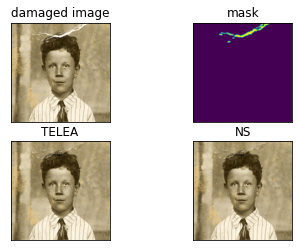

In [11]:

os.makedirs("temp",exist_ok=True)
os.makedirs("results",exist_ok=True)
img_dmg = Image.open(damaged_image_path)
img_dmg = img_dmg.resize((200,200))
img_dmg.save("temp/damage.png")
damaged_image = cv2.imread("temp/damage.png")

img_mask = Image.open(mask_path)
img_mask = img_mask.resize((200,200))
img_mask.save("temp/mask.png")

mask = cv2.imread("temp/mask.png", 0)

damaged_image = cv2.cvtColor(damaged_image, cv2.COLOR_BGR2RGB)

output1 = cv2.inpaint(damaged_image, mask, 1, cv2.INPAINT_TELEA)
output2 = cv2.inpaint(damaged_image, mask, 1, cv2.INPAINT_NS)

img = [damaged_image, mask, output1, output2]
titles = ['damaged image', 'mask', 'TELEA', 'NS']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])
    plt.imshow(img[i])
    plt.savefig("results/"+save_name)
plt.show()